In [ ]:
!pip install tensorflow gradio opencv-python


In [91]:
from google.colab import files

uploaded = files.upload()

Saving Traffic_Sign_Recognition.zip to Traffic_Sign_Recognition.zip


In [92]:
import zipfile
import os

zip_path = "/content/Traffic_Sign_Recognition.zip"
extract_folder = "/content/Traffic_Sign_Recognition"

os.makedirs(extract_folder, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print(" Unzipped to:", extract_folder)

 Unzipped to: /content/Traffic_Sign_Recognition


In [ ]:
from datasets import load_dataset

dataset = load_dataset('tanganke/gtsrb')
print(dataset)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

data/train-00000-of-00001.parquet:   0%|          | 0.00/224M [00:00<?, ?B/s]

data/test-00000-of-00001.parquet:   0%|          | 0.00/109M [00:00<?, ?B/s]

data/contrast-00000-of-00001.parquet:   0%|          | 0.00/100M [00:00<?, ?B/s]

data/gaussian_noise-00000-of-00001.parqu(…):   0%|          | 0.00/118M [00:00<?, ?B/s]

data/impulse_noise-00000-of-00001.parque(…):   0%|          | 0.00/110M [00:00<?, ?B/s]

data/jpeg_compression-00000-of-00001.par(…):   0%|          | 0.00/108M [00:00<?, ?B/s]

data/motion_blur-00000-of-00001.parquet:   0%|          | 0.00/109M [00:00<?, ?B/s]

data/pixelate-00000-of-00001.parquet:   0%|          | 0.00/38.5M [00:00<?, ?B/s]

data/spatter-00000-of-00001.parquet:   0%|          | 0.00/110M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/26640 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/12630 [00:00<?, ? examples/s]

Generating contrast split:   0%|          | 0/12630 [00:00<?, ? examples/s]

Generating gaussian_noise split:   0%|          | 0/12630 [00:00<?, ? examples/s]

Generating impulse_noise split:   0%|          | 0/12630 [00:00<?, ? examples/s]

Generating jpeg_compression split:   0%|          | 0/12630 [00:00<?, ? examples/s]

Generating motion_blur split:   0%|          | 0/12630 [00:00<?, ? examples/s]

Generating pixelate split:   0%|          | 0/12630 [00:00<?, ? examples/s]

Generating spatter split:   0%|          | 0/12630 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 26640
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 12630
    })
    contrast: Dataset({
        features: ['image', 'label'],
        num_rows: 12630
    })
    gaussian_noise: Dataset({
        features: ['image', 'label'],
        num_rows: 12630
    })
    impulse_noise: Dataset({
        features: ['image', 'label'],
        num_rows: 12630
    })
    jpeg_compression: Dataset({
        features: ['image', 'label'],
        num_rows: 12630
    })
    motion_blur: Dataset({
        features: ['image', 'label'],
        num_rows: 12630
    })
    pixelate: Dataset({
        features: ['image', 'label'],
        num_rows: 12630
    })
    spatter: Dataset({
        features: ['image', 'label'],
        num_rows: 12630
    })
})


In [93]:
import numpy as np
import cv2
from tensorflow.keras.utils import to_categorical

IMG_SIZE = 30
NUM_CLASSES = 43

def preprocess(split):
    images = []
    labels = []
    for item in split:
        img = item['image']
        img = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        images.append(img)
        labels.append(item['label'])
    return np.array(images), np.array(labels)

X_train, y_train = preprocess(dataset['train'])
X_test, y_test = preprocess(dataset['test'])

# Normalize
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

print("Data ready:", X_train.shape, X_test.shape)


Data ready: (26640, 30, 30, 3) (12630, 30, 30, 3)


In [94]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Conv2D(64, (3,3), activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 26, 26, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 9, 9, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 43)             │        11,051 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 339,019 (1.29 MB)

 Trainable params: 339,019 (1.29 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), batch_size=64)
model.save('traffic_sign_cnn.h5')

Epoch 1/5
417/417 ━━━━━━━━━━━━━━━━━━━━ 82s 197ms/step - accuracy: 0.4191 - loss: 2.1417 - val_accuracy: 0.8948 - val_loss: 0.3871
Epoch 2/5
417/417 ━━━━━━━━━━━━━━━━━━━━ 72s 173ms/step - accuracy: 0.8835 - loss: 0.3805 - val_accuracy: 0.9356 - val_loss: 0.2450
Epoch 3/5
417/417 ━━━━━━━━━━━━━━━━━━━━ 71s 171ms/step - accuracy: 0.9448 - loss: 0.1829 - val_accuracy: 0.9479 - val_loss: 0.1905
Epoch 4/5
417/417 ━━━━━━━━━━━━━━━━━━━━ 72s 172ms/step - accuracy: 0.9592 - loss: 0.1311 - val_accuracy: 0.9541 - val_loss: 0.1839
Epoch 5/5
417/417 ━━━━━━━━━━━━━━━━━━━━ 70s 169ms/step - accuracy: 0.9660 - loss: 0.1067 - val_accuracy: 0.9570 - val_loss: 0.1672


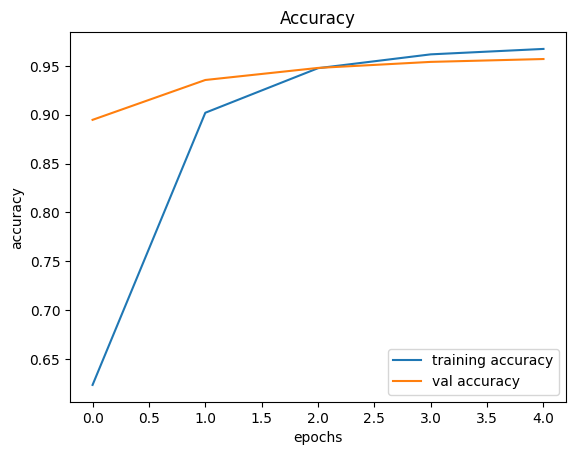

In [95]:
import matplotlib.pyplot as plt

plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

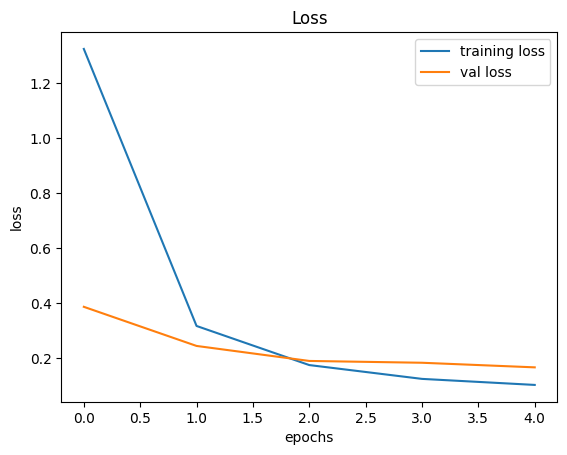

In [ ]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import cv2
from tensorflow.keras.utils import to_categorical
import pandas as pd
from PIL import Image

IMG_SIZE = 30
NUM_CLASSES = 43

def preprocess(split):
    images = []
    labels = []
    for item in split:
        img = item['image']
        img = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        images.append(img)
        labels.append(item['label'])
    return np.array(images), np.array(labels)

X_train, y_train = preprocess(dataset['train'])
X_test, y_test = preprocess(dataset['test'])

# Normalize
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

print("Data ready:", X_train.shape, X_test.shape)

def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test=np.array(data)
    return X_test,label

Data ready: (26640, 30, 30, 3) (12630, 30, 30, 3)


In [ ]:
X_test, label = preprocess(dataset['test'])

In [ ]:
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_pred_classes

395/395 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step


array([0, 0, 0, ..., 9, 9, 9])

In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np

# Calculate Y_pred and Y_pred_classes (moved from previous cell for self-containment)
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)

print(accuracy_score(label, Y_pred_classes))

395/395 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step
0.9300870942201108


In [ ]:
model.save("./traffic_sign_cnn.h5")

In [ ]:
loss, acc = model.evaluate(X_test, y_test)
print(f" Test Accuracy: {acc*100:.2f}%")

395/395 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9493 - loss: 17.5165
 Test Accuracy: 93.01%


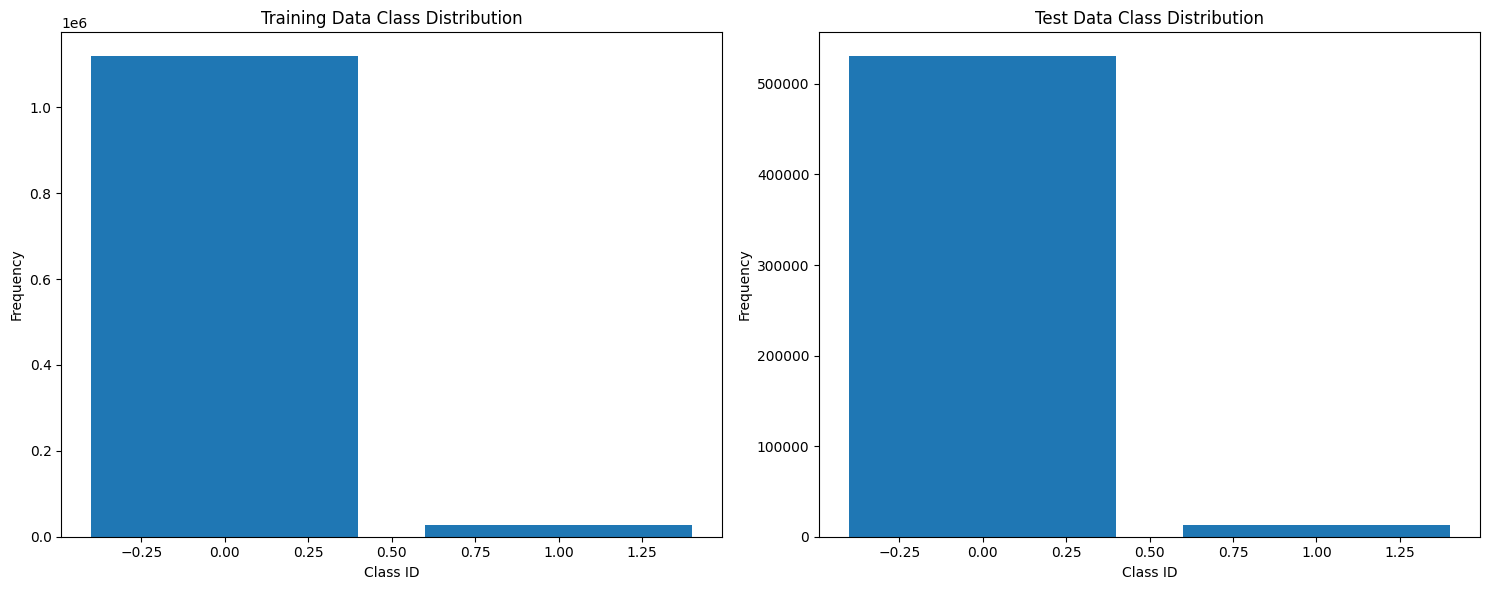

Sample images from first 10 classes:


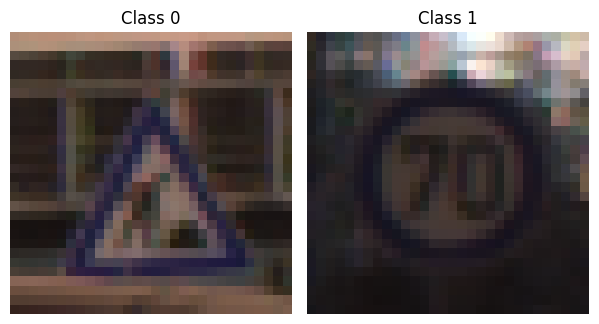

In [96]:
import matplotlib.pyplot as plt
import random

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
unique, counts = np.unique(y_train, return_counts=True)
plt.bar(unique, counts)
plt.title('Training Data Class Distribution')
plt.xlabel('Class ID')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
unique_test, counts_test = np.unique(y_test, return_counts=True)
plt.bar(unique_test, counts_test)
plt.title('Test Data Class Distribution')
plt.xlabel('Class ID')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

def display_sample_images(images, labels, num_classes=10):
    plt.figure(figsize=(15, 8))
    for class_id in range(num_classes):
        class_indices = np.where(labels == class_id)[0]
        if len(class_indices) > 0:
            sample_idx = random.choice(class_indices)
            plt.subplot(2, 5, class_id + 1)
            plt.imshow(images[sample_idx])
            plt.title(f'Class {class_id}')
            plt.axis('off')
    plt.tight_layout()
    plt.show()

print("Sample images from first 10 classes:")
display_sample_images(X_train, y_train)

In [98]:
model.save('traffic_sign_model.h5')
print("Model saved as 'traffic_sign_model.h5'")

def predict_traffic_sign(image_path, model):
    """
    Predict traffic sign from an image file
    """
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (32, 32))
    image = image.astype('float32') / 255.0
    image = np.expand_dims(image, axis=0)

    prediction = model.predict(image)
    predicted_class = np.argmax(prediction)
    confidence = np.max(prediction)

    return predicted_class, confidence

sample_image_path = "/content/GTSRB/Final_Test/Images/00000.ppm"
if os.path.exists(sample_image_path):
    predicted_class, confidence = predict_traffic_sign(sample_image_path, model)
    print(f"Predicted Class: {predicted_class}")
    print(f"Confidence: {confidence:.4f}")

    sample_image = cv2.imread(sample_image_path)
    sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)
    plt.imshow(sample_image)
    plt.title(f'Predicted: Class {predicted_class} (Confidence: {confidence:.2f})')
    plt.axis('off')
    plt.show()

Model saved as 'traffic_sign_model.h5'


In [99]:
from google.colab import files

print("Please upload the fresh 'Dataset.zip' file you downloaded to your local machine.")
uploaded = files.upload()

Please upload the fresh 'Dataset.zip' file you downloaded to your local machine.


Saving Dataset.zip to Dataset.zip


In [100]:
!npm install -g localtunnel

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏
changed 22 packages in 3s
⠏
⠏3 packages are looking for funding
⠏  run `npm fund` for details
⠏

In [101]:
import gradio as gr
from tensorflow.keras.models import load_model

model = load_model('traffic_sign_cnn.h5')

labels_dict = {
    0: "Speed limit (20km/h)",
    1: "Speed limit (30km/h)",
    2: "Speed limit (50km/h)",
    3: "Speed limit (60km/h)",
    4: "Speed limit (70km/h)",
    5: "Speed limit (80km/h)",
    6: "End of speed limit (80km/h)",
    7: "Speed limit (100km/h)",
    8: "Speed limit (120km/h)",
    9: "No passing",
}

def classify_image(img):
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    pred = model.predict(img)
    idx = np.argmax(pred)
    conf = np.max(pred)
    return {labels_dict.get(idx, f"Class {idx}"): float(conf)}

demo = gr.Interface(
    fn=classify_image,
    inputs=gr.Image(type="numpy"),
    outputs=gr.Label(num_top_classes=3),
    title="🚦 Traffic Sign Recognition",
    description="Upload or draw a traffic sign to classify it."
)

demo.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://50b1054b8ae1be3887.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
model.save('traffic_sign_cnn.h5')
print("Model saved successfully as 'traffic_sign_cnn.h5'")

Model saved successfully as 'traffic_sign_cnn.h5'


In [97]:
import os

if os.path.exists('traffic_sign_cnn.h5'):
    print('The model file "traffic_sign_cnn.h5" was saved successfully.')
else:
    print('The model file "traffic_sign_cnn.h5" was NOT found.')

The model file "traffic_sign_cnn.h5" was saved successfully.
